In [1]:
!pip install pandas 

In [2]:
pip install psycopg2-binary


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import psycopg2 as ps

In [4]:
import pandas as pd
import pandas.io.sql as sqlio

In [5]:
#conexão com o banco de dados
conn = ps.connect(dbname = "ANP",
                  user = 'postgres',
                  password = 'DoritoMan5677',
                  host = 'localhost',
                  port = '5432')

In [6]:
sql = """ 
SELECT * FROM anp.preco_combustivel
"""

In [7]:
# trazendo os resultados sql e a conexão com o banco
df = sqlio.read_sql_query(sql, conn)

/var/folders/rx/b37fngts0v1fljw_kvgpxnpm0000gn/T/ipykernel_1094/158990251.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = sqlio.read_sql_query(sql, conn)


In [8]:
df.head()

,regiao,estado,municipio,revenda,cnpj,nome_rua,numero_rua,complemento,bairro,cep,produto,data_coleta,valor_venda,unidade_medida,bandeira
0,N,AC,RIO BRANCO,AUTO POSTO AMAPA - EIRELI,00.529.581/0001-53,VIA CHICO MENDES,3570,None,AREAL,69906-119,GASOLINA,2022-01-03,6.99,R$ / litro,VIBRA ENERGIA
1,N,AC,RIO BRANCO,AUTO POSTO AMAPA - EIRELI,00.529.581/0001-53,VIA CHICO MENDES,3570,None,AREAL,69906-119,ETANOL,2022-01-03,5.99,R$ / litro,VIBRA ENERGIA
2,N,AC,RIO BRANCO,AUTO POSTO AMAPA - EIRELI,00.529.581/0001-53,VIA CHICO MENDES,3570,None,AREAL,69906-119,DIESEL,2022-01-03,6.09,R$ / litro,VIBRA ENERGIA
3,N,AC,RIO BRANCO,AUTO POSTO AMAPA - EIRELI,00.529.581/0001-53,VIA CHICO MENDES,3570,None,AREAL,69906-119,GASOLINA ADITIVADA,2022-01-03,7.05,R$ / litro,VIBRA ENERGIA
4,N,AC,RIO BRANCO,AUTO POSTO AMAPA - EIRELI,00.529.581/0001-53,VIA CHICO MENDES,3570,None,AREAL,69906-119,DIESEL S10,2022-01-03,6.12,R$ / litro,VIBRA ENERGIA


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4428267 entries, 0 to 4428266
Data columns (total 15 columns):
 #   Column          Dtype  
---  ------          -----  
 0   regiao          object 
 1   estado          object 
 2   municipio       object 
 3   revenda         object 
 4   cnpj            object 
 5   nome_rua        object 
 6   numero_rua      object 
 7   complemento     object 
 8   bairro          object 
 9   cep             object 
 10  produto         object 
 11  data_coleta     object 
 12  valor_venda     float64
 13  unidade_medida  object 
 14  bandeira        object 
dtypes: float64(1), object(14)
memory usage: 506.8+ MB


In [10]:
df.shape

(4428267, 15)

In [11]:
df['data_coleta'] = pd.to_datetime(df['data_coleta'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4428267 entries, 0 to 4428266
Data columns (total 15 columns):
 #   Column          Dtype         
---  ------          -----         
 0   regiao          object        
 1   estado          object        
 2   municipio       object        
 3   revenda         object        
 4   cnpj            object        
 5   nome_rua        object        
 6   numero_rua      object        
 7   complemento     object        
 8   bairro          object        
 9   cep             object        
 10  produto         object        
 11  data_coleta     datetime64[ns]
 12  valor_venda     float64       
 13  unidade_medida  object        
 14  bandeira        object        
dtypes: datetime64[ns](1), float64(1), object(13)
memory usage: 506.8+ MB


In [13]:
# verificando se existem dados nulos
df.isnull().sum()

regiao                  0
estado                  0
municipio               0
revenda                 0
cnpj                    0
nome_rua                0
numero_rua           2843
complemento       3374774
bairro              13814
cep                     0
produto                 0
data_coleta             0
valor_venda             0
unidade_medida          0
bandeira                0
dtype: int64

In [14]:
# selecionando as colunas que usaremos na nossa análise
df_anp = df[['data_coleta', 'regiao', 'estado', 'municipio', 'bandeira', 'produto', 'valor_venda']]

In [15]:
df_anp.head()

,data_coleta,regiao,estado,municipio,bandeira,produto,valor_venda
0,2022-01-03,N,AC,RIO BRANCO,VIBRA ENERGIA,GASOLINA,6.99
1,2022-01-03,N,AC,RIO BRANCO,VIBRA ENERGIA,ETANOL,5.99
2,2022-01-03,N,AC,RIO BRANCO,VIBRA ENERGIA,DIESEL,6.09
3,2022-01-03,N,AC,RIO BRANCO,VIBRA ENERGIA,GASOLINA ADITIVADA,7.05
4,2022-01-03,N,AC,RIO BRANCO,VIBRA ENERGIA,DIESEL S10,6.12


In [16]:
df_anp['ano'] = df_anp['data_coleta'].dt.year
df_anp['mes'] = df_anp['data_coleta'].dt.month

/var/folders/rx/b37fngts0v1fljw_kvgpxnpm0000gn/T/ipykernel_1094/3211014845.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_anp['ano'] = df_anp['data_coleta'].dt.year
/var/folders/rx/b37fngts0v1fljw_kvgpxnpm0000gn/T/ipykernel_1094/3211014845.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_anp['mes'] = df_anp['data_coleta'].dt.month


In [17]:
df_anp.head()

,data_coleta,regiao,estado,municipio,bandeira,produto,valor_venda,ano,mes
0,2022-01-03,N,AC,RIO BRANCO,VIBRA ENERGIA,GASOLINA,6.99,2022,1
1,2022-01-03,N,AC,RIO BRANCO,VIBRA ENERGIA,ETANOL,5.99,2022,1
2,2022-01-03,N,AC,RIO BRANCO,VIBRA ENERGIA,DIESEL,6.09,2022,1
3,2022-01-03,N,AC,RIO BRANCO,VIBRA ENERGIA,GASOLINA ADITIVADA,7.05,2022,1
4,2022-01-03,N,AC,RIO BRANCO,VIBRA ENERGIA,DIESEL S10,6.12,2022,1


In [18]:
df_anp.describe().round(2)

,data_coleta,valor_venda,ano,mes
count,4428267,4428267.00,4428267.00,4428267.00
mean,2020-07-04 11:21:47.738220032,4.49,2020.03,6.26
min,2018-07-02 00:00:00,1.80,2018.00,1.00
25%,2019-04-22 00:00:00,3.55,2019.00,3.00
50%,2020-03-23 00:00:00,4.20,2020.00,6.00
75%,2021-10-19 00:00:00,5.20,2021.00,9.00
max,2022-12-30 00:00:00,9.65,2022.00,12.00
std,NaN,1.29,1.34,3.38


In [19]:
print(f'Os produtos comercializados são: {df_anp.produto.unique()}')

Os produtos comercializados são: ['GASOLINA' 'ETANOL' 'DIESEL' 'GASOLINA ADITIVADA' 'DIESEL S10' 'GNV']


In [20]:
print(f'A coleta de dados foi feita nos anos de {df_anp.ano.unique()}')

A coleta de dados foi feita nos anos de [2022 2021 2020 2019 2018]


In [21]:
df_anp_valor = df_anp[['ano', 'produto', 'valor_venda']]

In [22]:
df_anp_valor.groupby(['produto', 'ano']).agg(['min', 'max', 'mean']).round(2)

valor_venda            
                                min   max  mean
produto            ano                         
DIESEL             2018        2.87  4.95  3.55
                   2019        2.87  4.99  3.58
                   2020        2.45  5.09  3.42
                   2021        3.10  6.99  4.69
                   2022        3.14  9.00  6.63
DIESEL S10         2018        2.93  5.09  3.64
                   2019        2.79  5.09  3.68
                   2020        2.46  5.38  3.51
                   2021        2.80  6.96  4.74
                   2022        3.59  9.65  6.73
ETANOL             2018        1.90  4.98  3.09
                   2019        2.10  5.47  3.17
                   2020        1.80  5.15  3.18
                   2021        2.05  7.90  4.67
                   2022        2.49  7.98  4.85
GASOLINA           2018        3.65  6.29  4.58
                   2019        3.39  6.29  4.42
                   2020        2.87  5.90  4.28
                   2021        3.10  8.00  5.89
                   2022        3.49  8.99  6.32
GASOLINA ADITIVADA 2020        3.69  6.00  4.59
                   2021        3.46  8.99  6.04
                   2022        4.09  9.28  6.47
GNV                2018        1.91  4.10  2.89
                   2019        2.00  4.56  3.21
                   2020        2.00  4.78  3.17
                   2021        2.38  6.70  3.89
                   2022        3.17  7.99  5.04

In [23]:
df_anp_valor_estado = df_anp[['ano', 'produto', 'estado', 'valor_venda']]

In [24]:
df_anp_valor_estado.head(3)

,ano,produto,estado,valor_venda
0,2022,GASOLINA,AC,6.99
1,2022,ETANOL,AC,5.99
2,2022,DIESEL,AC,6.09


In [25]:
df_anp_valor_estado.groupby(['produto', 'ano', 'estado']).agg(['min', 'max', 'mean']).round(2)

valor_venda            
                            min   max  mean
produto ano  estado                        
DIESEL  2018 AC            3.38  4.89  4.38
             AL            3.23  4.23  3.71
             AM            3.17  4.46  3.69
             AP            3.59  4.20  3.86
             BA            3.12  4.41  3.59
...                         ...   ...   ...
GNV     2022 RN            4.11  4.99  4.50
             RS            4.59  6.89  5.88
             SC            4.00  6.89  5.50
             SE            4.47  5.49  4.99
             SP            3.59  6.99  5.22

[726 rows x 3 columns]

In [26]:
df_anp_bandeira = df_anp[['ano', 'bandeira', 'produto']]
df_anp_bandeira.head(3)

,ano,bandeira,produto
0,2022,VIBRA ENERGIA,GASOLINA
1,2022,VIBRA ENERGIA,ETANOL
2,2022,VIBRA ENERGIA,DIESEL


In [27]:
# quantidade de bandeiras por produto/ano
df_anp_bandeira.groupby(['ano', 'produto']).bandeira.nunique()

ano   produto           
2018  DIESEL                61
      DIESEL S10            59
      ETANOL                62
      GASOLINA              62
      GNV                   22
2019  DIESEL                59
      DIESEL S10            61
      ETANOL                63
      GASOLINA              64
      GNV                   22
2020  DIESEL                52
      DIESEL S10            57
      ETANOL                58
      GASOLINA              58
      GASOLINA ADITIVADA    43
      GNV                   23
2021  DIESEL                57
      DIESEL S10            57
      ETANOL                58
      GASOLINA              58
      GASOLINA ADITIVADA    57
      GNV                   22
2022  DIESEL                51
      DIESEL S10            60
      ETANOL                60
      GASOLINA              60
      GASOLINA ADITIVADA    58
      GNV                   24
Name: bandeira, dtype: int64

In [28]:
df_anp_bandeira_estado = df_anp[['ano', 'bandeira', 'produto', 'estado']]
df_anp_bandeira_estado.head(3)

,ano,bandeira,produto,estado
0,2022,VIBRA ENERGIA,GASOLINA,AC
1,2022,VIBRA ENERGIA,ETANOL,AC
2,2022,VIBRA ENERGIA,DIESEL,AC


In [29]:
df_anp_bandeira_estado.groupby(['ano', 'produto', 'estado']).bandeira.nunique()

ano   produto  estado
2018  DIESEL   AC        6
               AL        4
               AM        9
               AP        3
               BA        9
                        ..
2022  GNV      RN        5
               RS        6
               SC        8
               SE        5
               SP        7
Name: bandeira, Length: 726, dtype: int64

Criando visualizações de dados

In [30]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 3.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 13.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.4/243.4 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 18.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 19.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 10.6 MB/s eta 0:00:00


In [31]:
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 4.0 MB/s eta 0:00:00a 0:00:01


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df_anp.head(3)

,data_coleta,regiao,estado,municipio,bandeira,produto,valor_venda,ano,mes
0,2022-01-03,N,AC,RIO BRANCO,VIBRA ENERGIA,GASOLINA,6.99,2022,1
1,2022-01-03,N,AC,RIO BRANCO,VIBRA ENERGIA,ETANOL,5.99,2022,1
2,2022-01-03,N,AC,RIO BRANCO,VIBRA ENERGIA,DIESEL,6.09,2022,1


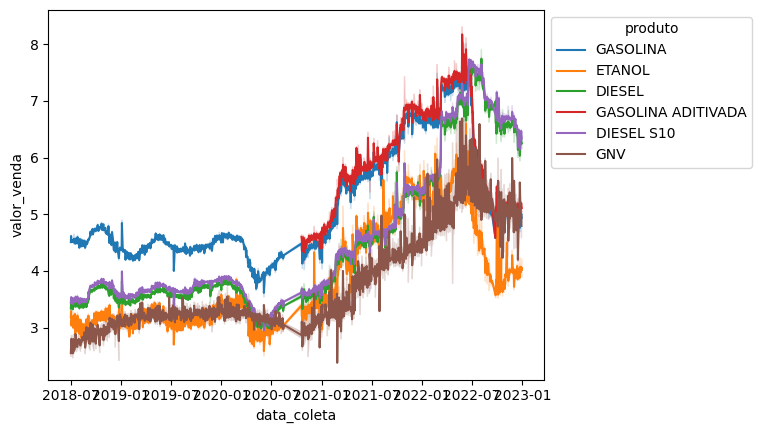

In [35]:
ax = sns.lineplot(data = df_anp, x = "data_coleta", y = "valor_venda", hue = "produto")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1))

In [36]:
# separando o dataset para entender melhor a base
gasolina_aditivada = df_anp.loc[df['produto'] == 'GASOLINA ADITIVADA']
gasolina = df_anp.loc[df['produto'] == 'GASOLINA']
diesel_s10 = df_anp.loc[df['produto'] == 'DIESEL S10']
diesel = df_anp.loc[df['produto'] == 'DIESEL']
etanol = df_anp.loc[df['produto'] == 'ETANOL']
gnv = df_anp.loc[df['produto'] == 'GNV']

In [37]:
# criando funções que ajudam a plotar gráficos

In [38]:
def plotar_boxplot_2V(titulo, labelx, labely, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.boxplot(x=x, y=y, data=dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo, loc='left', fontsize=18)
    ax.set_xlabel(labelx, fontsize=14)
    ax.set_ylabel(labely, fontsize=14);

In [39]:
def plotar_boxplot_geral(y, dataset):
    ax = sns.boxplot(y=y, data=dataset)
    ax.figure.set_size_inches(4,4)

Analisando os combustíveis

Gasolina Aditivada

In [40]:
print('Gasolina Aditivada')
gasolina_aditivada.valor_venda.describe().round(2)

Gasolina Aditivada


count    340489.00
mean          6.19
std           0.94
min           3.46
25%           5.49
50%           6.19
75%           6.92
max           9.28
Name: valor_venda, dtype: float64

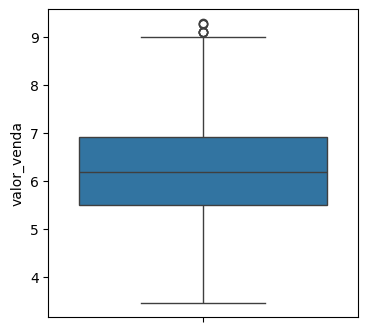

In [41]:
plotar_boxplot_geral('valor_venda', gasolina_aditivada)

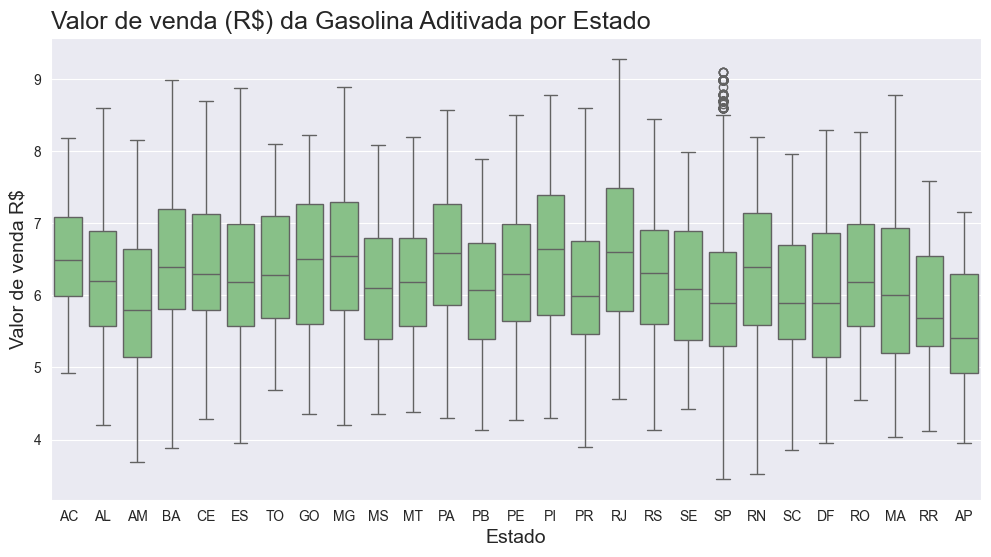

In [42]:
plotar_boxplot_2V('Valor de venda (R$) da Gasolina Aditivada por Estado',
                  'Estado',
                  'Valor de venda R$',
                  'estado',
                  'valor_venda',
                  gasolina_aditivada)

Gasolina Comum

In [43]:
print('Gasolina')
gasolina.valor_venda.describe().round(2)

Gasolina


count    1254165.00
mean           5.00
std            1.00
min            2.87
25%            4.30
50%            4.68
75%            5.50
max            8.99
Name: valor_venda, dtype: float64

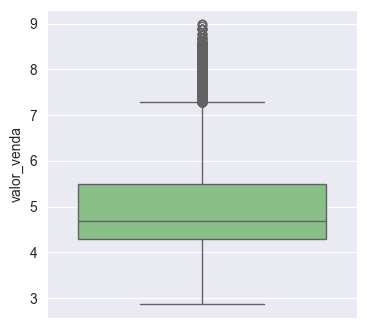

In [44]:
plotar_boxplot_geral('valor_venda', gasolina)

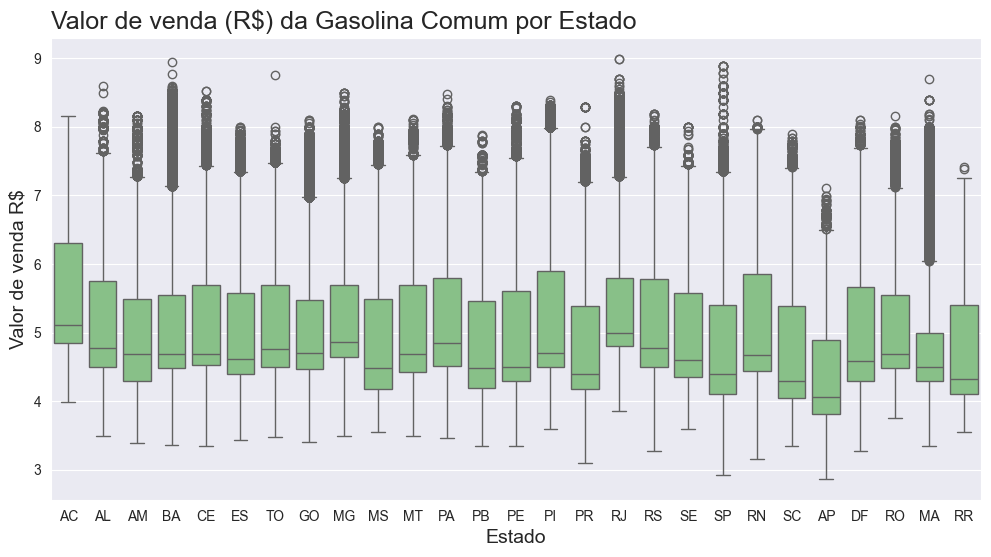

In [45]:
plotar_boxplot_2V('Valor de venda (R$) da Gasolina Comum por Estado',
                  'Estado',
                  'Valor de venda R$',
                  'estado',
                  'valor_venda',
                  gasolina)

Bandeiras

In [46]:
df_anp['bandeira'].nunique()

85

In [47]:
df_anp['bandeira'].unique()

array(['VIBRA ENERGIA', 'BRANCA', 'SABBÁ', "ATEM' S", 'RAIZEN',
       'IPIRANGA', 'ALESAT', 'SP', 'TAURUS', 'STANG', 'RODOIL',
       'PETROX DISTRIBUIDORA', 'EQUADOR', 'MASUT DISTRIBUIDORA',
       'RIO BRANCO', 'FAN', 'CHARRUA', 'RAIZEN MIME', 'CIAPETRO',
       'PETROBAHIA', 'IDAZA', 'AMERICANOIL', 'SMALL',
       'SETTA DISTRIBUIDORA', 'LARCO', 'FEDERAL ENERGIA', 'WATT',
       'TOTALENERGIES', 'TEMAPE', 'ATLÂNTICA', 'SIMARELLI', 'DISLUB',
       'UNI', 'PETROSERRA', 'POTENCIAL', 'MAXSUL', 'DIBRAPE', 'RUFF C.J.',
       'RZD DISTRIBUIDORA', 'ROYAL FIC', 'TDC DISTRIBUIDORA',
       'MONTEPETRO', 'TORRAO', 'WALENDOWSKY', 'SUL COMBUSTÍVEIS',
       'REJAILE', 'TOBRAS', 'PELIKANO', 'ESTRADA', 'PETRONAC',
       'SUPERGASBRAS ENERGIA', 'LIQUIGÁS', 'FOGAS', 'NACIONAL GÁS BUTANO',
       'BAHIANA', 'ULTRAGAZ', 'AMAZONGÁS', 'ON PETRO', 'D`MAIS',
       'PETROBRASIL', 'PETROBRAS DISTRIBUIDORA S.A.', 'TOTAL BRASIL',
       'FEDERAL', 'TAG DISTRIBUIDORA', 'PODIUM', 'SABB¡',
       'SUL COMBU

In [48]:
bandeiras_estado = df_anp_bandeira_estado.groupby('estado').bandeira.nunique().reset_index()

In [49]:
bandeiras_estado.head(3)

,estado,bandeira
0,AC,11
1,AL,10
2,AM,12


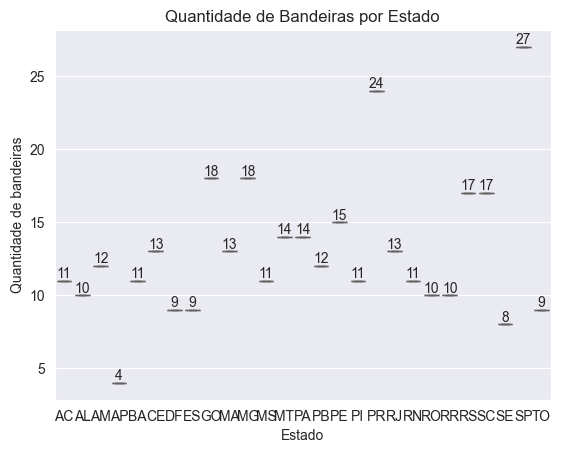

In [50]:
sns.boxplot(x='estado', y='bandeira', data=bandeiras_estado)

plt.title('Quantidade de Bandeiras por Estado')
plt.xlabel('Estado')
plt.ylabel('Quantidade de bandeiras')

for index, row in bandeiras_estado.iterrows():
    plt.annotate(row['bandeira'], xy=(index, row['bandeira']), ha='center', va='bottom')

plt.show()